In [1]:
import numpy as np
import pandas as pd
from debugpy.launcher import channel
from scipy.signal import firwin, lfilter
from scipy import ndimage
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('/Users/admin/PycharmProjects/ET_eksploracja/hyperscanning-signal-analysis')
%matplotlib inline

In [2]:
import sys
sys.path.append('../src')
import dataloader
from data_structures import MultiModalDataPd

In [3]:
!pwd

/Users/admin/Library/CloudStorage/GoogleDrive-j.zygierewicz@uw.edu.pl/Mój dysk/SYNCIN_JZ/HYPERSCANNING_SIGNAL_ANALYSIS/hyperscanning-signal-analysis/scripts


In [4]:
dyade_id = "W003"
mmd = MultiModalDataPd(dyade_id)
mmd.add_data(eeg_path = f"../data/{dyade_id}/eeg/")
mmd.add_data(et_path = f"../data/{dyade_id}/et/")

#mmd.add_data(et_path = "../data/et_data/")


Detected events: [{'name': 'Brave', 'start': 382.15625, 'duration': 59.3291015625}, {'name': 'Peppa', 'start': 312.259765625, 'duration': 59.61328125}, {'name': 'Incredibles', 'start': 242.8115234375, 'duration': 59.21484375}, {'name': 'Talk_1'}, {'name': 'Talk_2'}]
Applying filters to EEG data. Using fir filtering method.
Based on EEG, setting fs to: 1024
min 236.3607020850177
max 1095.132976085064


In [5]:
mmd.data.head()

,time_idx,events,EEG_ch_Fp1,EEG_ch_Fp2,EEG_ch_F7,EEG_ch_F3,EEG_ch_Fz,EEG_ch_F4,EEG_ch_F8,EEG_ch_M1,...,ET_ch_x,ET_ch_y,ET_cg_x,ET_cg_y,ET_ch_diameter3d,ET_cg_diameter3d,ET_ch_blinks,ET_cg_blinks,ET_event,time
0,-248639.0,None,-142.9608,32.025761,121.871536,368.45459,225.140625,32.846825,-328.39035,-73.5811,...,None,None,None,None,None,None,None,None,None,-242.811523
1,-248638.0,None,-545.077148,116.543495,445.072144,1371.940063,840.943176,111.330254,-1248.815796,-259.428986,...,None,None,None,None,None,None,None,None,None,-242.810547
2,-248637.0,None,-935.290649,198.744431,758.968201,2346.172363,1438.832397,187.673172,-2142.20752,-439.807739,...,None,None,None,None,None,None,None,None,None,-242.809570
3,-248636.0,None,-1304.859009,276.885193,1056.682007,3269.600586,2005.614624,260.262268,-2988.655273,-610.688904,...,None,None,None,None,None,None,None,None,None,-242.808594
4,-248635.0,None,-1645.808838,349.367645,1331.930542,4122.547852,2529.241943,327.617035,-3769.992432,-768.396362,...,None,None,None,None,None,None,None,None,None,-242.807617


In [6]:
mmd.data.events.unique()

array([None, 'Incredibles', 'Peppa', 'Brave'], dtype=object)

In [7]:
mmd.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119909 entries, 0 to 1119908
Data columns (total 57 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   time_idx          1119909 non-null  float64
 1   events            182436 non-null   object 
 2   EEG_ch_Fp1        523328 non-null   object 
 3   EEG_ch_Fp2        523328 non-null   object 
 4   EEG_ch_F7         523328 non-null   object 
 5   EEG_ch_F3         523328 non-null   object 
 6   EEG_ch_Fz         523328 non-null   object 
 7   EEG_ch_F4         523328 non-null   object 
 8   EEG_ch_F8         523328 non-null   object 
 9   EEG_ch_M1         523328 non-null   object 
 10  EEG_ch_T3         523328 non-null   object 
 11  EEG_ch_C3         523328 non-null   object 
 12  EEG_ch_Cz         523328 non-null   object 
 13  EEG_ch_C4         523328 non-null   object 
 14  EEG_ch_T4         523328 non-null   object 
 15  EEG_ch_M2         523328 non-null   object 
 16  

## Test plot of diode signal colored by events

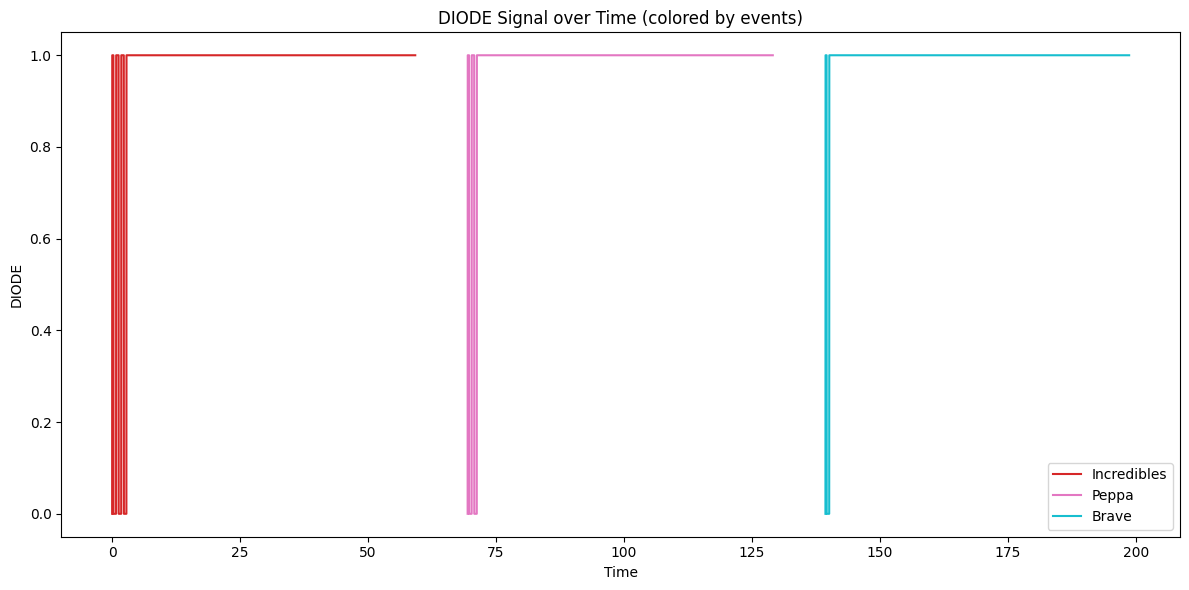

In [8]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time'], event_data['DIODE'], label=event, color=event_colors[event])

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
plt.show()

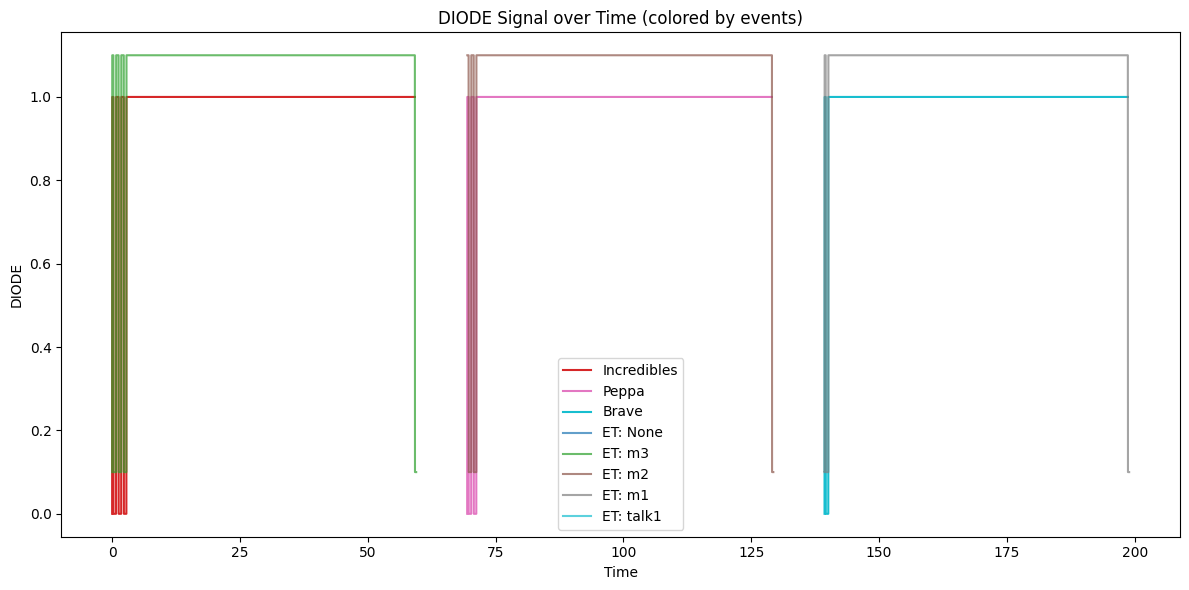

In [9]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time'], event_data['DIODE'], label=event, color=event_colors[event])


# add plots of DIODE vs time_idx colored based on ET_events
et_events = mmd.data['ET_event'].unique()
et_colors = plt.cm.tab10(np.linspace(0, 1, len(et_events)))
et_event_colors = dict(zip(et_events, et_colors))

for et_event in et_events:
    et_event_data = mmd.data[mmd.data['ET_event'] == et_event]
    ax.plot(et_event_data['time'], et_event_data['DIODE']+0.1, label=f'ET: {et_event}', color=et_event_colors[et_event], linestyle='-', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
#plt.xlim(120, 180)
plt.show()

# Check eye-blinks from ET and EEG

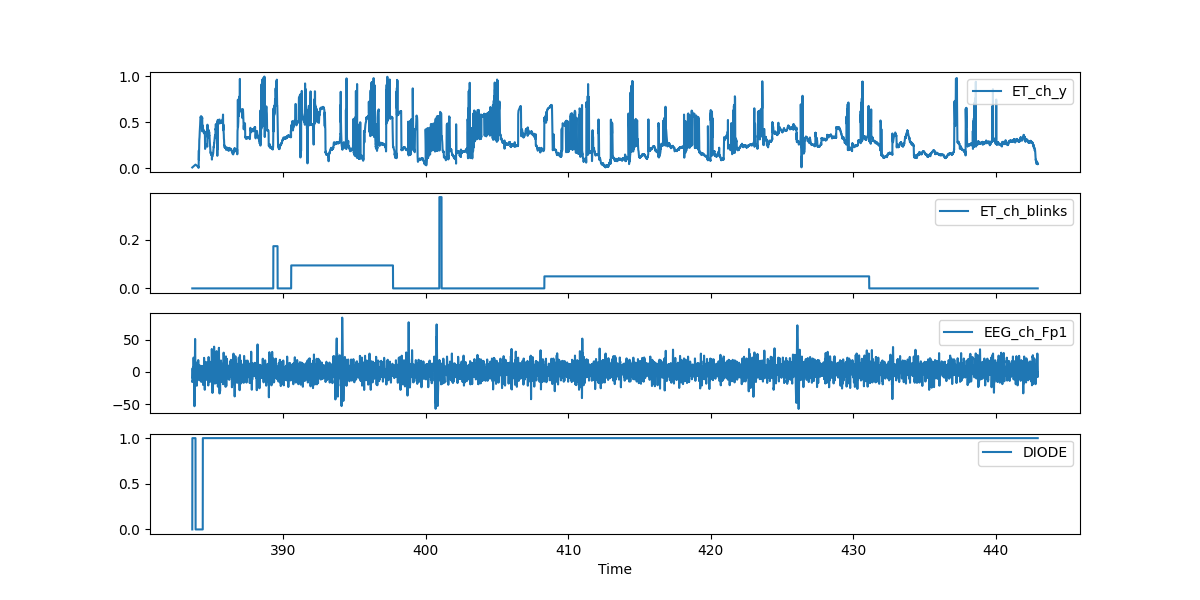

In [33]:
%matplotlib widget
data_selected = mmd.data[(mmd.data.events == 'Brave')]
t0 = 244.283 #start time of the event in sec in the ET data
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=4)
#ax[0].plot(data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_x')
#ax[1].plot(data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
#ax[2].plot(data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')

ax[0].plot(t0+data_selected['time'], data_selected['ET_ch_y'], linestyle='-', label='ET_ch_y')
ax[1].plot(t0+data_selected['time'], data_selected['ET_ch_blinks'], linestyle='-', label='ET_ch_blinks')
ax[2].plot(t0+data_selected['time'], data_selected['EEG_ch_Fp1'], linestyle='-', label='EEG_ch_Fp1')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].plot(t0+data_selected['time'], data_selected['DIODE'], linestyle='-', label='DIODE')
ax[3].legend()
#plt.xlim(268,270) incredibles blink



plt.xlabel('Time')
plt.show()

In [40]:
#convert time in sec to min:sec
def sec_to_minsec(seconds):
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    print(f"{seconds} -> {minutes}:{secs:02d}") 
#convert time in min:sec to sec
def minsec_to_sec(minsec):
    minutes, secs = map(int, minsec.split(':'))
    print(f'{minsec} -> {minutes * 60 + secs}')
 
sec_to_minsec(394.5)
sec_to_minsec(400.75)
sec_to_minsec(426)
minsec_to_sec('6:38')
minsec_to_sec('6:46')

394.5 -> 6:34
400.75 -> 6:40
426 -> 7:06
6:38 -> 398
6:46 -> 406


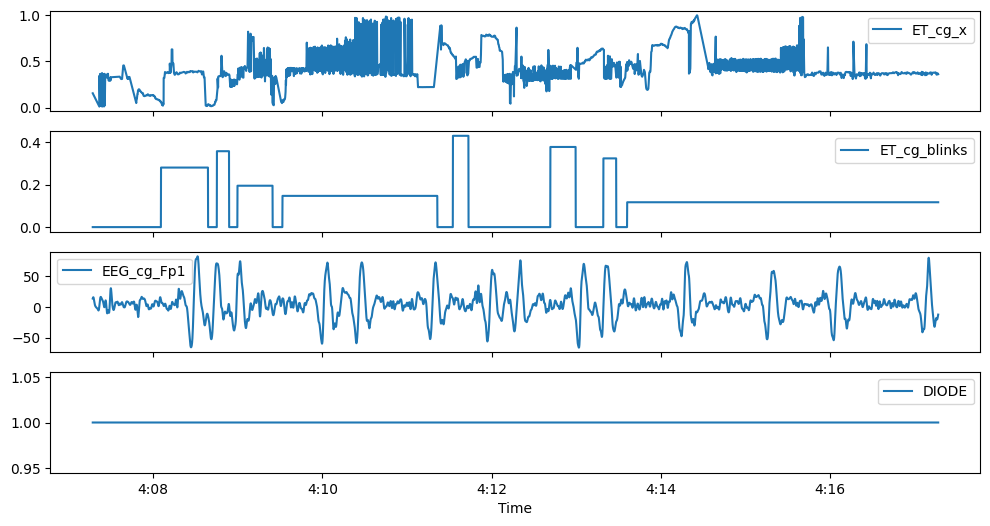

In [31]:
%matplotlib inline
#data_selected = mmd.data[(mmd.data.events == 'Incredibles')]
data_selected = mmd.data[(mmd.data.time > 3) & (mmd.data.time < 13)]
t0 = 244.283 #start time of the event in sec in the ET data
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=4)
ax[0].plot(t0+data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_x')
ax[1].plot(t0+data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
ax[2].plot(t0+data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].plot(t0+data_selected['time'], data_selected['DIODE'], linestyle='-', label='DIODE')
ax[3].legend()
# convert x axis ticks to min:sec
ax_ticks = ax[3].get_xticks()
ax[3].set_xticklabels([f"{int(tick//60)}:{int(tick%60):02d}" for tick in ax_ticks])    


plt.xlabel('Time')
plt.show()

In [17]:
sec_to_minsec(248.5)
minsec_to_sec("4:10")
minsec_to_sec("4:11")

248.5 -> 4:08
4:10 -> 250
4:11 -> 251


## Exaple of selecting EEG Fz, ECG and ET y and blinks  data form 'Pepa' event

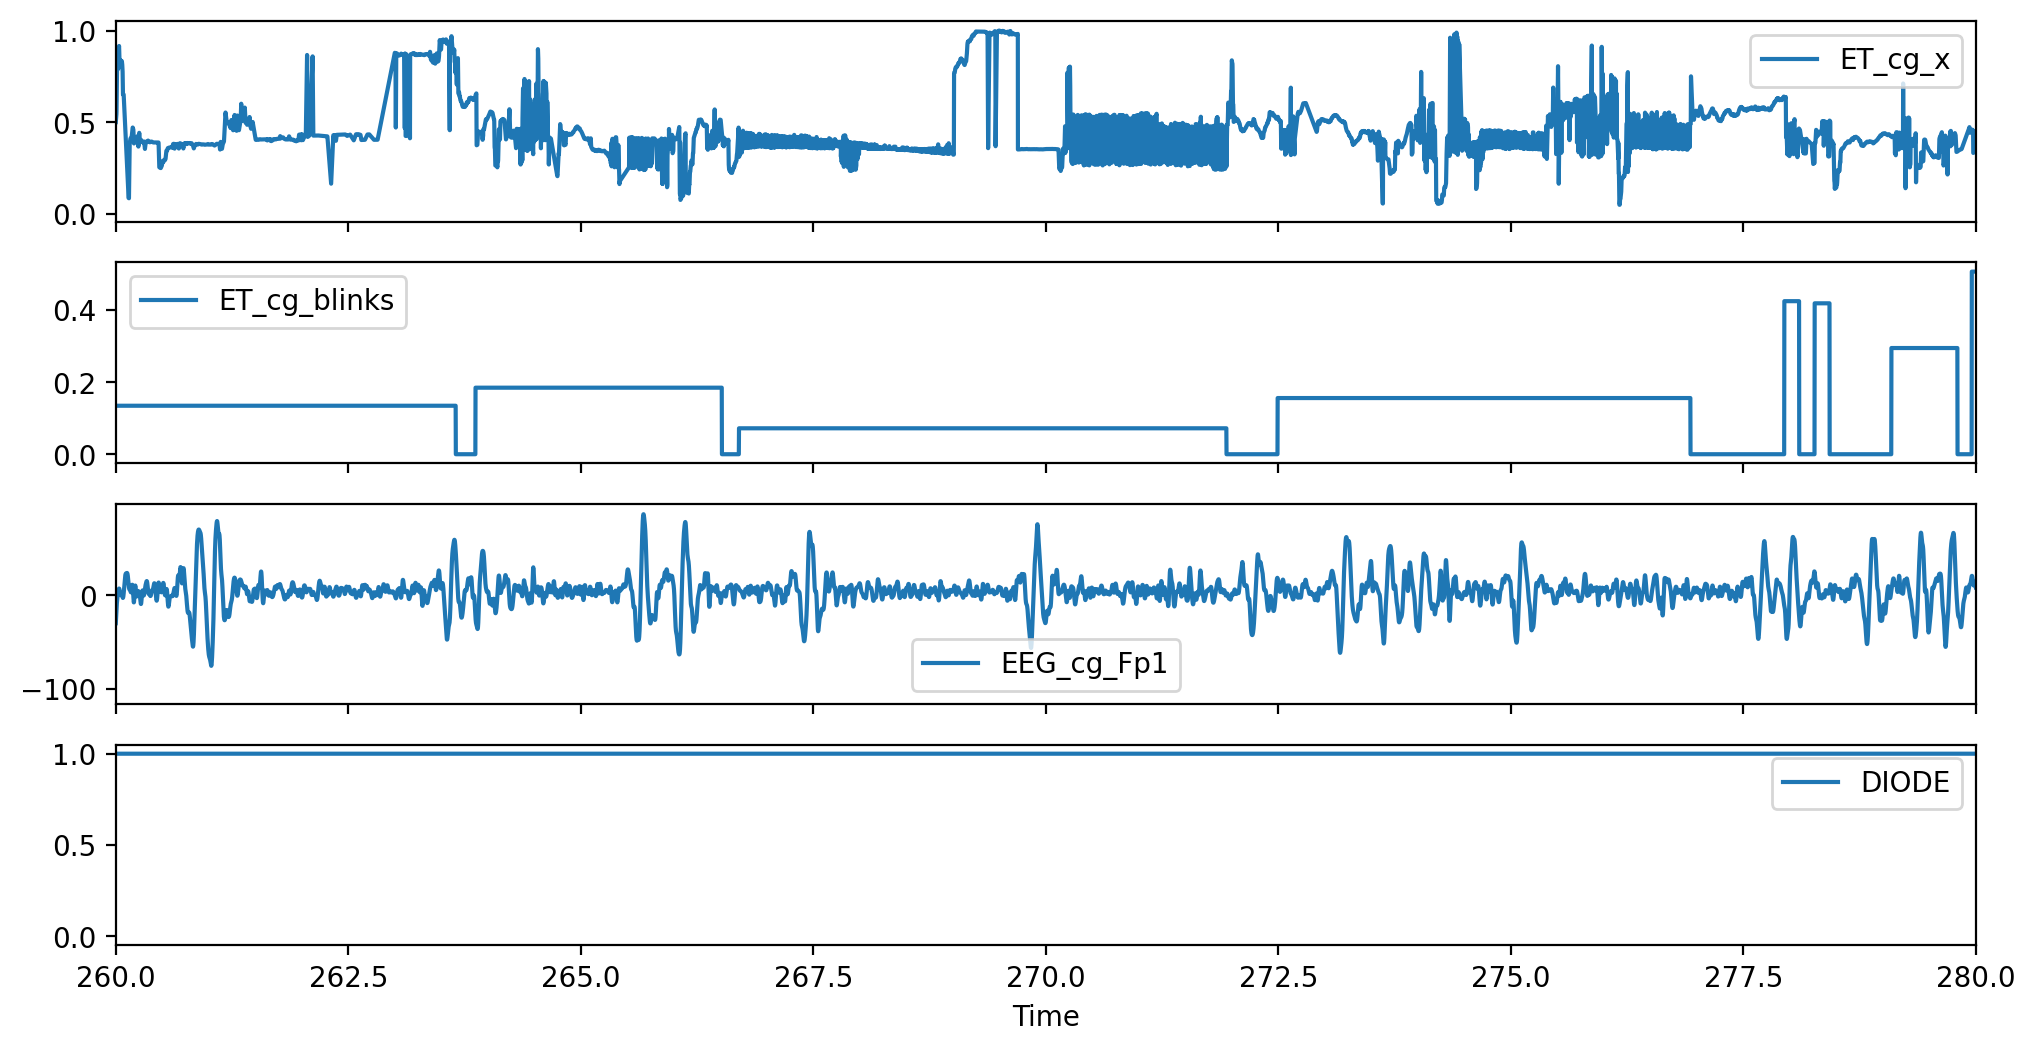

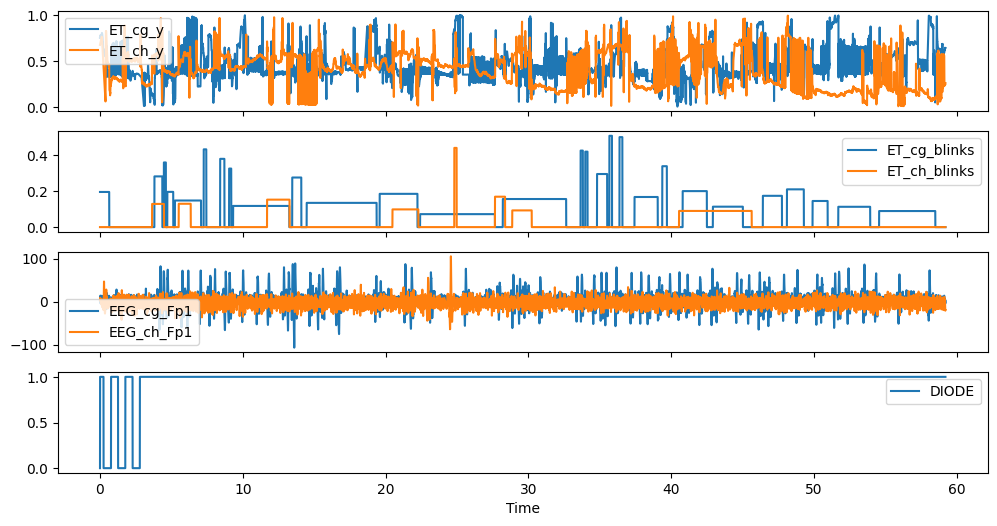

In [14]:
%matplotlib inline
data_selected = mmd.data[(mmd.data.events == 'Incredibles')]
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=4)
ax[0].plot(data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_y')
ax[0].plot(data_selected['time'], data_selected['ET_ch_y'], linestyle='-', label='ET_ch_y')
ax[0].legend()

ax[1].plot(data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
ax[1].plot(data_selected['time'], data_selected['ET_ch_blinks'], linestyle='-', label='ET_ch_blinks')
ax[1].legend()

ax[2].plot(data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')
ax[2].plot(data_selected['time'], data_selected['EEG_ch_Fp1'], linestyle='-', label='EEG_ch_Fp1')
ax[2].legend()

ax[3].plot(data_selected['time'], data_selected['DIODE'], linestyle='-', label='DIODE')
ax[3].legend()
#plt.xlim(0,20)
plt.xlabel('Time')
plt.show()